In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [2]:
#creating database connection
conn = sqlite3.connect('warehouse.db')
#fetching vendor summary data 
df = pd.read_sql_query("SELECT * FROM vendor_sales_summary", conn)
df.head()


,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,12546.0,JIM BEAM BRANDS COMPANY,1476,Jim Beam Traveler,16.05,21.99,1750.0,2550.0,40927.50,41.0,901.59,285.87,75.34,123880.97,-40025.91,-4439.480252,0.016078,0.022029
1,480.0,BACARDI USA INC,4227,Bacardi Superior Rum Trav,14.17,17.99,1750.0,2418.0,34263.06,0.0,0.00,0.00,0.00,89286.27,-34263.06,-inf,0.000000,0.000000
2,480.0,BACARDI USA INC,3858,Grey Goose Vodka,17.77,23.99,750.0,1847.0,32821.19,0.0,0.00,0.00,0.00,89286.27,-32821.19,-inf,0.000000,0.000000
3,4425.0,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,997.0,23120.43,76.0,2279.24,569.81,139.62,144929.24,-20841.19,-914.392078,0.076229,0.098581
4,3960.0,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,1241.0,20066.97,0.0,0.00,0.00,0.00,257032.07,-20066.97,-inf,0.000000,0.000000


In [3]:
#summary statistics 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,2179.0,6.870292e+03,9535.698216,105.00,3252.00,4425.00,9552.000000,98450.000000
Brand,2179.0,1.436257e+04,13278.475758,58.00,3880.50,8258.00,23264.000000,47014.000000
PurchasePrice,2179.0,1.278430e+01,12.875203,0.62,6.53,9.28,14.610000,240.590000
ActualPrice,2179.0,1.878850e+01,17.834949,0.99,9.99,13.99,20.990000,319.990000
Volume,2179.0,9.426934e+02,666.465223,50.00,750.00,750.00,750.000000,18000.000000
TotalPurchaseQuantity,2179.0,5.791556e+01,139.258496,1.00,12.00,22.00,45.000000,2550.000000
TotalPurchaseDollars,2179.0,6.107343e+02,1916.625805,3.24,102.04,198.00,428.860000,40927.500000
TotalSalesQuantity,2179.0,5.663148e+00,16.092689,0.00,0.00,0.00,4.000000,281.000000
TotalSalesDollars,2179.0,8.120436e+01,226.458706,0.00,0.00,0.00,75.945000,3599.000000
TotalSalesPrice,2179.0,4.090150e+01,84.706049,0.00,0.00,0.00,50.645000,779.800000


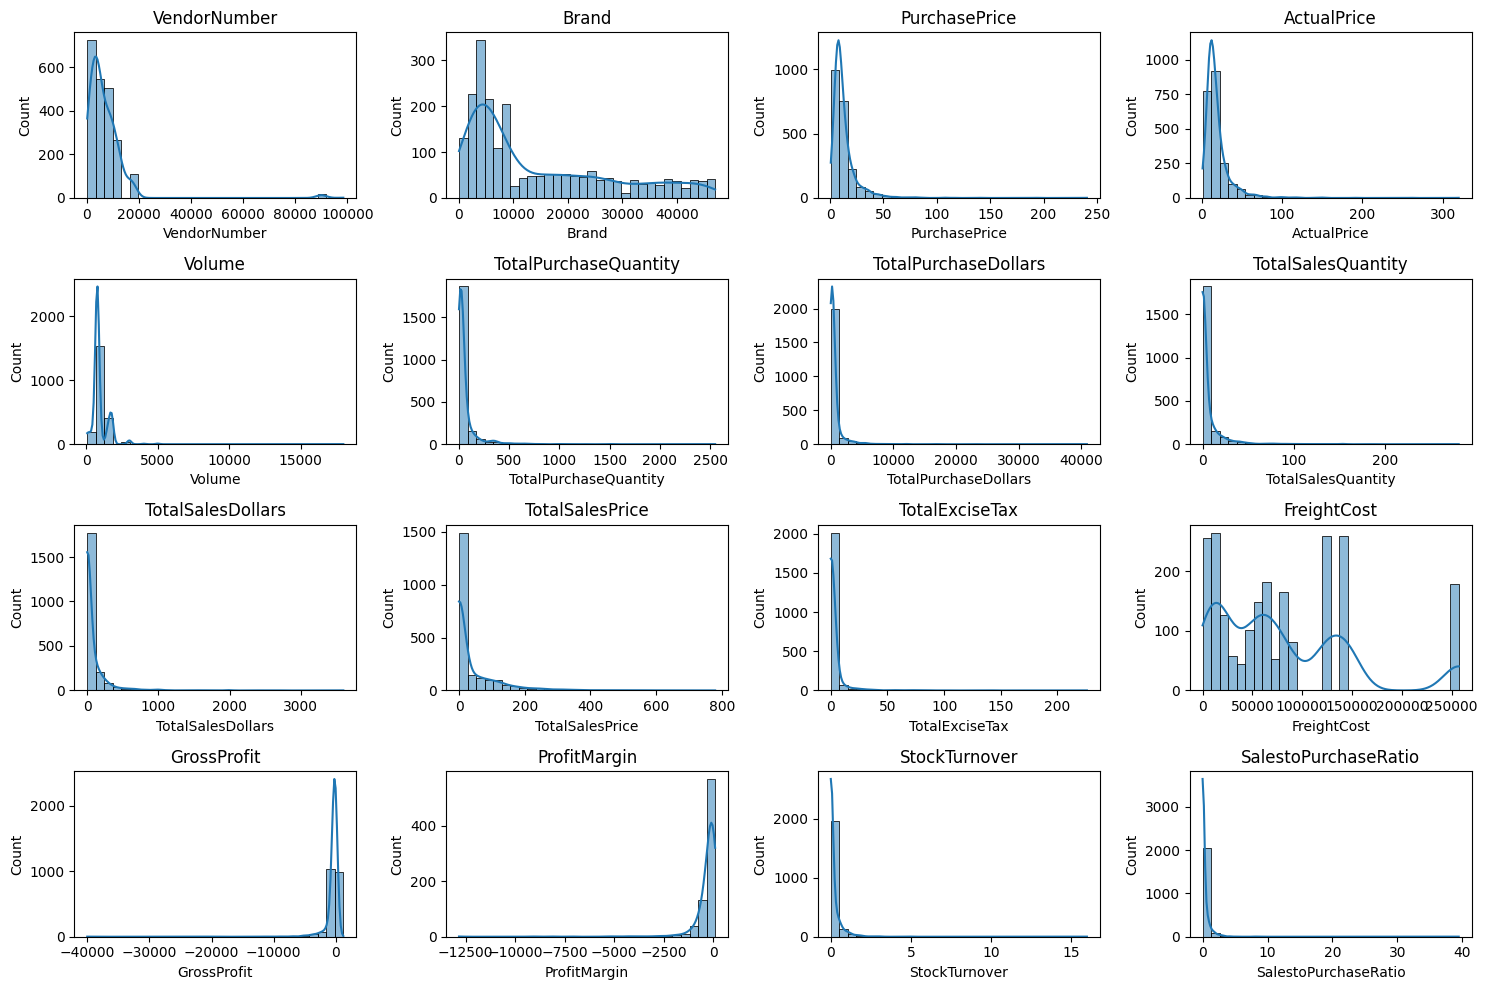

In [4]:
#distribution for numerical columns 
numerical_cols = df.select_dtypes(include = np.number).columns
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], kde = True, bins =30)
    plt.title(col)
plt.tight_layout()
plt.show()
    

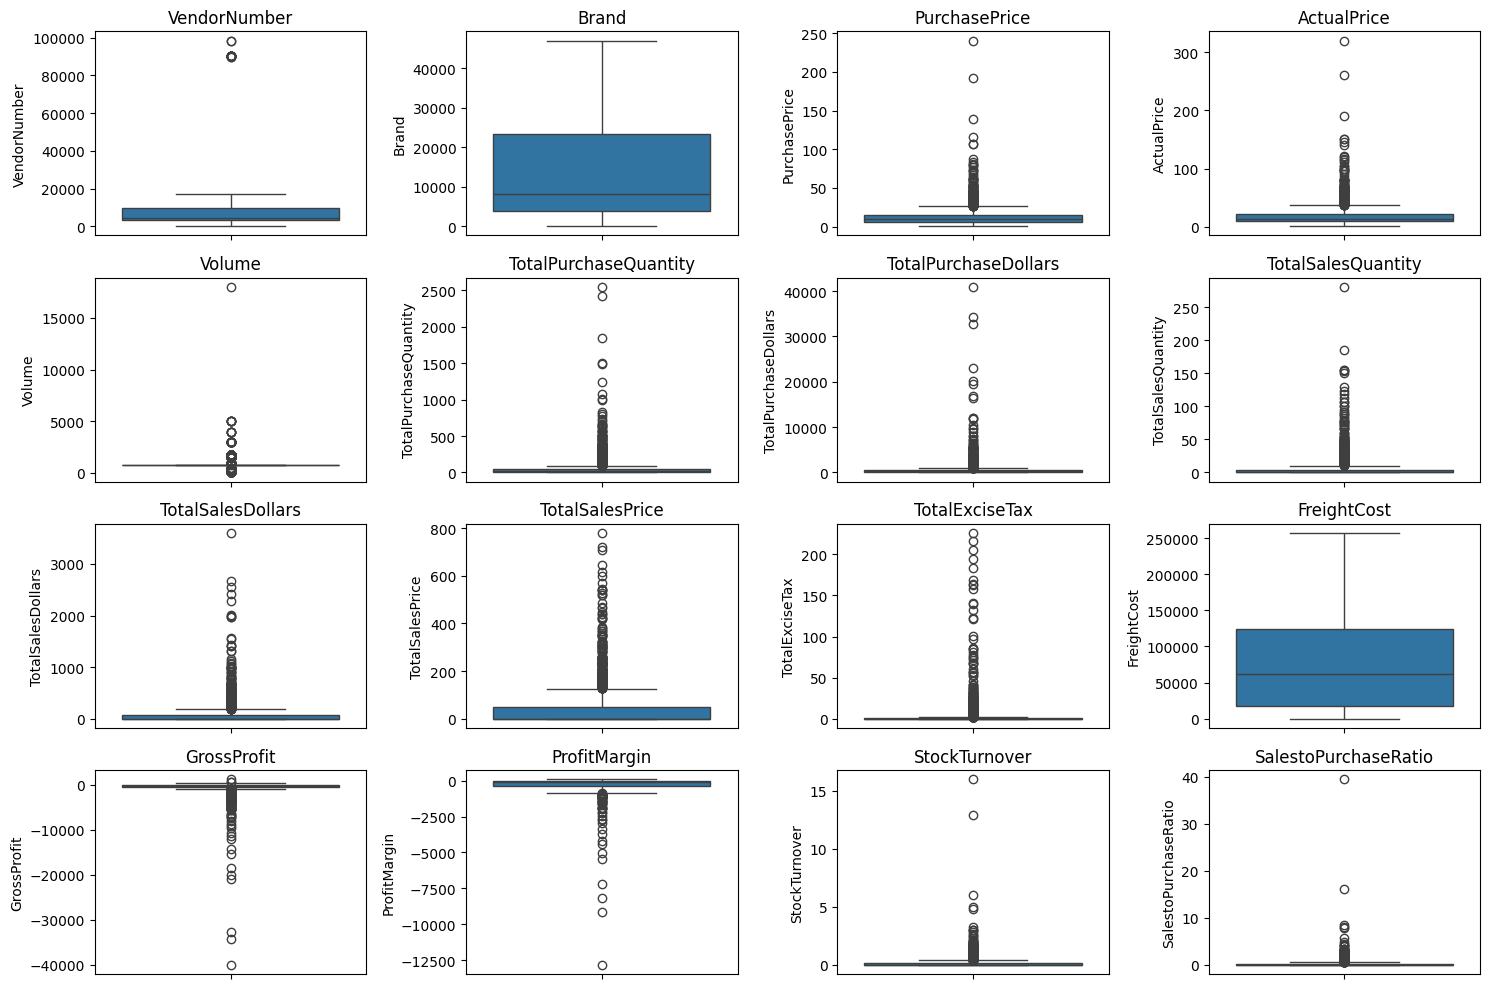

In [5]:
#outlier detection with boxplots
plt.figure(figsize=(15,10))
for i ,col in enumerate(numerical_cols):
    plt.subplot(4,4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [6]:
#filtering the data byremoving the inconsistencies 
df = pd.read_sql_query("""Select * 
FROM vendor_sales_summary
where GrossProfit >0
AND ProfitMargin >0
AND TotalSalesQuantity >0""" , conn)

In [7]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,3960.0,DIAGEO NORTH AMERICA INC,2757,Johnnie Walker Red Label,22.38,29.99,1750.0,78.0,1745.64,67.0,2009.33,539.82,123.11,257032.07,263.69,13.123280,0.858974,1.151056
1,3252.0,E & J GALLO WINERY,14006,Apothic Winemakers Red Blend,5.44,9.99,750.0,268.0,1457.92,155.0,1548.45,239.76,17.42,61966.91,90.53,5.846492,0.578358,1.062095
2,480.0,BACARDI USA INC,2663,Dewars White Label,21.42,29.99,1750.0,59.0,1263.78,37.0,1409.63,779.80,67.97,89286.27,145.85,10.346687,0.627119,1.115408
3,10000.0,MAJESTIC FINE WINES,24325,La Crema Chard Sonoma Cst,10.88,15.99,750.0,66.0,718.08,47.0,868.53,300.84,5.28,17587.59,150.45,17.322372,0.712121,1.209517
4,1128.0,BROWN-FORMAN CORP,171,Gentleman Jack,36.76,49.99,1750.0,17.0,624.92,14.0,699.86,149.97,25.73,68601.68,74.94,10.707856,0.823529,1.119919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,3960.0,DIAGEO NORTH AMERICA INC,3498,Baileys Vanilla Cinnamon,14.72,19.99,750.0,1.0,14.72,2.0,43.98,21.99,1.57,257032.07,29.26,66.530241,2.000000,2.987772
176,4425.0,MARTIGNETTI COMPANIES,14363,Educated Guess Cab Svgn Napa,13.51,20.99,750.0,1.0,13.51,5.0,104.95,83.96,0.55,144929.24,91.44,87.127203,5.000000,7.768320
177,3960.0,DIAGEO NORTH AMERICA INC,3486,Tanqueray,9.84,12.99,375.0,1.0,9.84,3.0,38.97,38.97,1.17,257032.07,29.13,74.749808,3.000000,3.960366
178,12546.0,JIM BEAM BRANDS COMPANY,281,Kamora Coffee Gift Pack,7.14,10.99,750.0,1.0,7.14,1.0,9.99,9.99,0.79,123880.97,2.85,28.528529,1.000000,1.399160


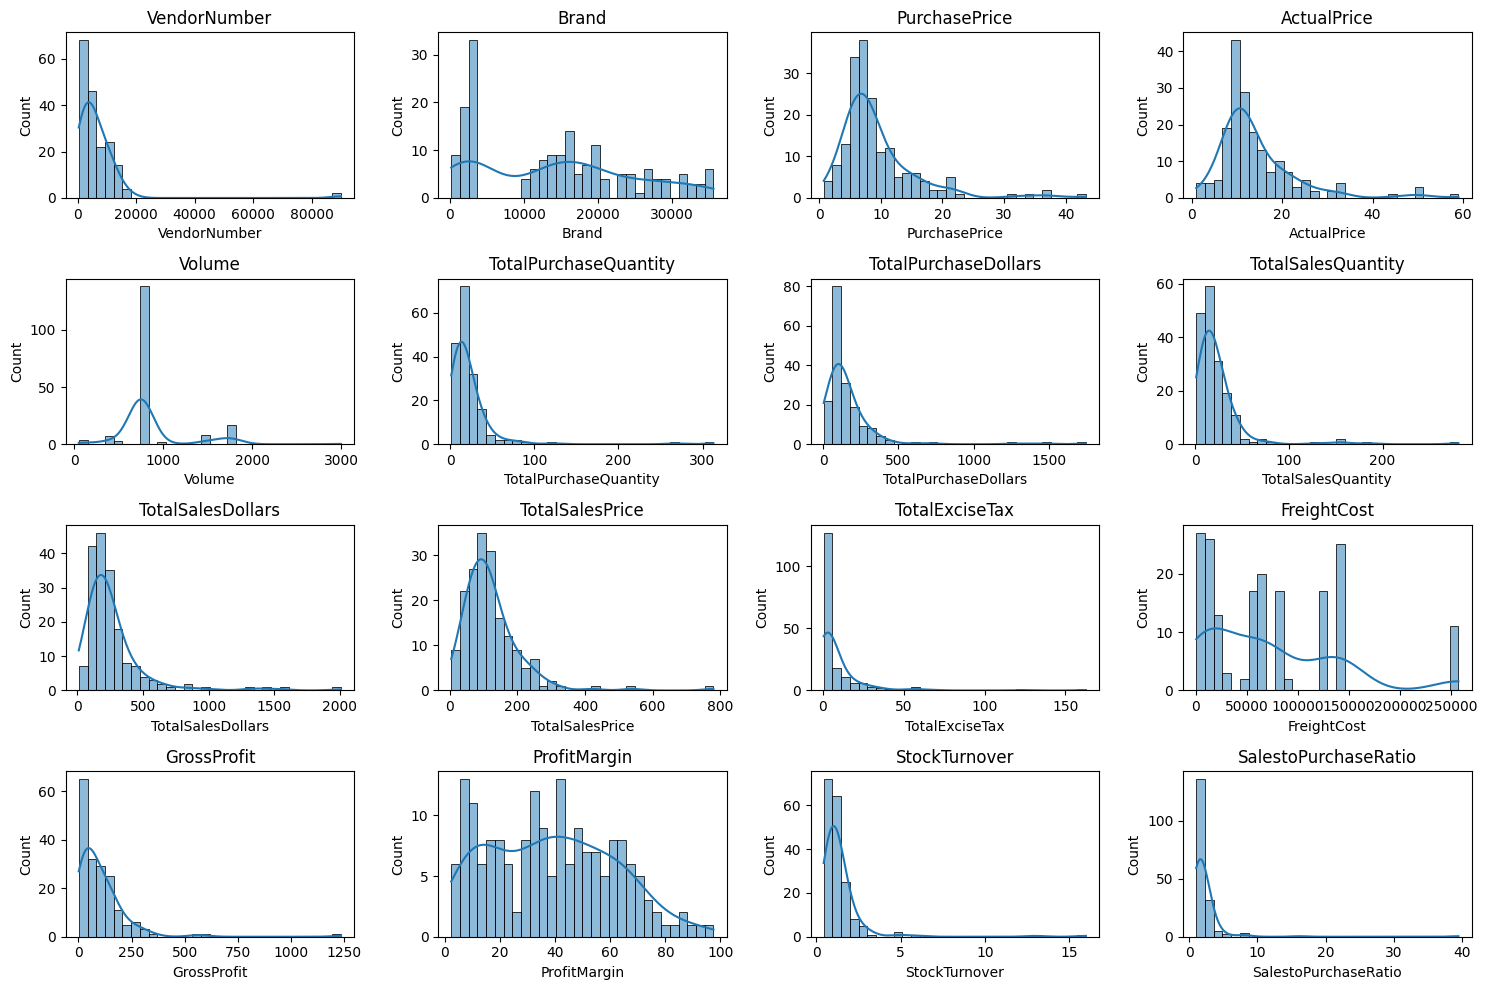

In [8]:
#distribution for numerical columns after cleaning 
numerical_cols = df.select_dtypes(include = np.number).columns
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], kde = True, bins =30)
    plt.title(col)
plt.tight_layout()
plt.show()

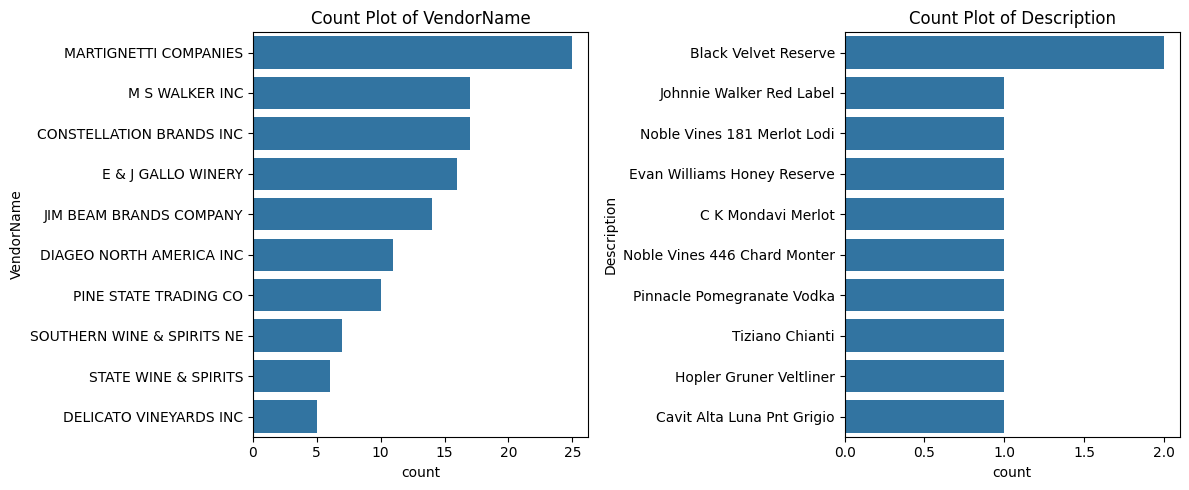

In [9]:
#count plot for categorical columns 
categorical_cols = ["VendorName", "Description"]

plt.figure(figsize=(12,5))
for i , col in enumerate(categorical_cols):
    plt.subplot(1,2, i+1)
    sns.countplot(y = df[col], order = df[col].value_counts().index[:10]) #top 10 categories
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()


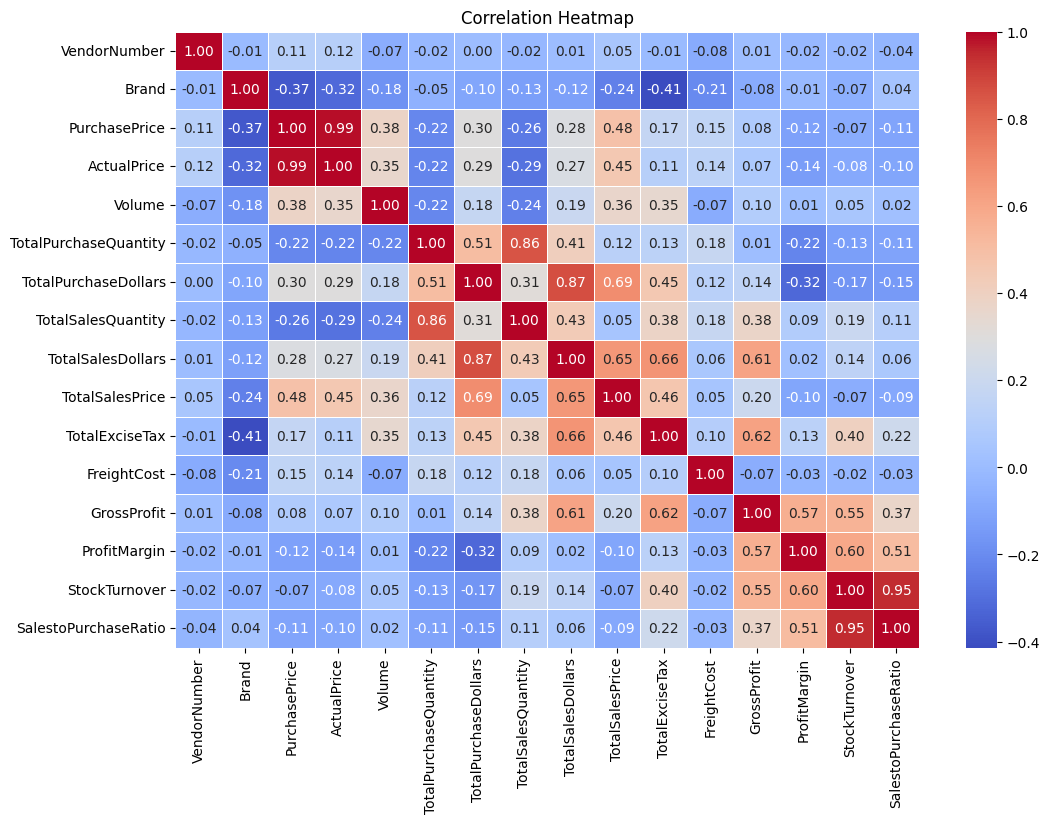

In [10]:
#Correlation Heatmap
plt.figure(figsize =(12,8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot = True, fmt=".2f", cmap = "coolwarm", linewidths = 0.5)
plt.title("Correlation Heatmap")
plt.show()

DATA ANALYSIS

In [ ]:
1.Identify brands that needs promotional or pricing adjustment whhich exhibit lower sales performace but higher profit margin 

In [11]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'}).reset_index()

In [12]:
brand_performance

,Description,TotalSalesDollars,ProfitMargin
0,Acrobat Pnt Gris Oregon,119.90,18.331943
1,Acumen Moutainside Red Napa,199.92,7.728091
2,Angeline Pnt Nr,461.58,32.328090
3,Antigal Uno Malbec Mendoza,127.92,12.288931
4,Apothic Winemakers Red Blend,1548.45,5.846492
...,...,...,...
174,Yellow Tail Big Bold Red,113.66,15.396797
175,Yellow Tail Moscato,218.81,5.146017
176,Yellow Tail Shiraz Ausl,161.77,29.974655
177,Yellow Tail Svgn Bl,94.93,57.020963


In [13]:
#setting a particular treshold value above which if any barnd goes then it requires promotional activity 

low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_sales_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [14]:
low_sales_threshold

115.207

In [15]:
high_sales_threshold

63.29609798514721

In [16]:
#filter brands with low sales but high profit margins

target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_sales_threshold)
]
print("Brands with low Sales but High Profit Margins:")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with low Sales but High Profit Margins:


,Description,TotalSalesDollars,ProfitMargin
149,Tanqueray,38.97,74.749808
5,Baileys Vanilla Cinnamon,43.98,66.530241
60,Educated Guess Cab Svgn Napa,104.95,87.127203


In [17]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars']<10000] #for better visualization 

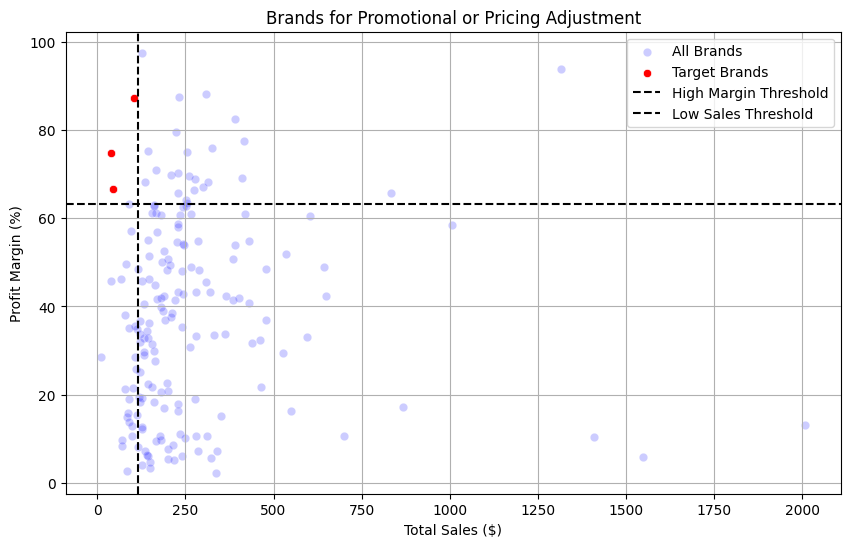

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example threshold values — adjust as needed
high_margin_threshold = 63.29 # 20% profit margin
low_sales_threshold = 115.207  # $10,000 total sales

# Create plot
plt.figure(figsize=(10, 6))

sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color="blue", label="All Brands", alpha=0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color="red", label="Target Brands")

# Add threshold lines
plt.axhline(high_margin_threshold, linestyle='--', color='black', label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--', color='black', label="Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustment")
plt.legend()
plt.grid(True)
plt.show()


Which vendor and brands demonstrate the highest sales performance ?

In [23]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1000000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1000:.2f}K"
    else:
        return str(value)


In [19]:
#top vendor & brands sales performance

top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors

VendorName
MARTIGNETTI COMPANIES         5506.93
M S WALKER INC                4741.03
E & J GALLO WINERY            4640.17
DIAGEO NORTH AMERICA INC      4048.83
JIM BEAM BRANDS COMPANY       3582.12
CONSTELLATION BRANDS INC      3135.71
SOUTHERN WINE & SPIRITS NE    2304.25
PINE STATE TRADING CO         2093.40
STATE WINE & SPIRITS          1700.80
BACARDI USA INC               1656.44
Name: TotalSalesDollars, dtype: float64

In [20]:
top_brands

Description
Johnnie Walker Red Label        2009.33
Apothic Winemakers Red Blend    1548.45
Dewars White Label              1409.63
Old Mexico Gold Tequila         1315.95
Hennessey VS +VSOP 50mL         1007.64
La Crema Chard Sonoma Cst        868.53
F Coppola Black Label Claret     832.51
Gentleman Jack                   699.86
Black Stallion Cab Svgn Napa     647.73
Robert Hall Cab Svgn             643.54
Name: TotalSalesDollars, dtype: float64

In [24]:
top_brands.apply(lambda x: format_dollars(x))

Description
Johnnie Walker Red Label                    2.01K
Apothic Winemakers Red Blend                1.55K
Dewars White Label                          1.41K
Old Mexico Gold Tequila                     1.32K
Hennessey VS +VSOP 50mL                     1.01K
La Crema Chard Sonoma Cst       868.5300000000002
F Coppola Black Label Claret               832.51
Gentleman Jack                             699.86
Black Stallion Cab Svgn Napa               647.73
Robert Hall Cab Svgn            643.5400000000002
Name: TotalSalesDollars, dtype: object

In [25]:
top_vendors.apply(lambda x: format_dollars(x))

VendorName
MARTIGNETTI COMPANIES         5.51K
M S WALKER INC                4.74K
E & J GALLO WINERY            4.64K
DIAGEO NORTH AMERICA INC      4.05K
JIM BEAM BRANDS COMPANY       3.58K
CONSTELLATION BRANDS INC      3.14K
SOUTHERN WINE & SPIRITS NE    2.30K
PINE STATE TRADING CO         2.09K
STATE WINE & SPIRITS          1.70K
BACARDI USA INC               1.66K
Name: TotalSalesDollars, dtype: object

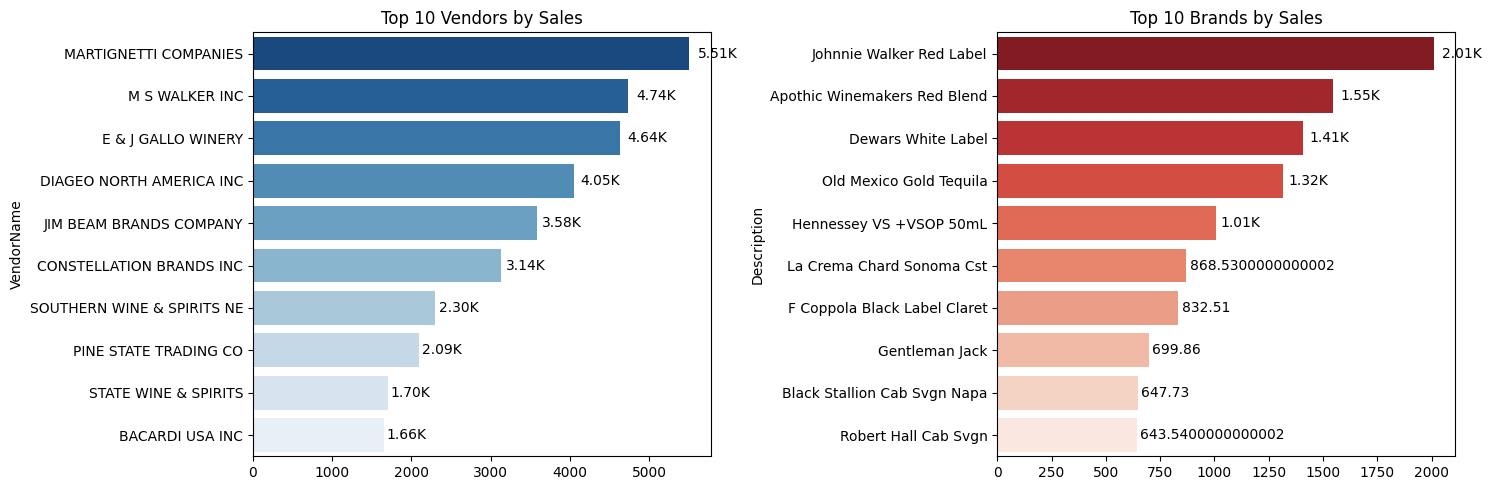

In [27]:
# plot for top vendors
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(
        bar.get_width() + (bar.get_width() * 0.02),
        bar.get_y() + bar.get_height() / 2,
        format_dollars(bar.get_width()),
        ha='left', va='center', fontsize=10, color='black'
    )

# plot for top brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(
        bar.get_width() + (bar.get_width() * 0.02),
        bar.get_y() + bar.get_height() / 2,
        format_dollars(bar.get_width()),
        ha='left', va='center', fontsize=10, color='black'
    )

plt.tight_layout()
plt.show()


2. which vendor contribute most to the total purchase dollar ?

In [42]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'
}).reset_index()

# ✅ Correct percentage contribution calculation
vendor_performance["PurchaseContribution%"] = (
    vendor_performance["TotalPurchaseDollars"] / vendor_performance["TotalPurchaseDollars"].sum()
) * 100

# Optional: round to 2 decimal places
vendor_performance["PurchaseContribution%"] = vendor_performance["PurchaseContribution%"].round(2)

# ✅ Sort vendors by contribution
vendor_performance = vendor_performance.sort_values("PurchaseContribution%", ascending=False).reset_index(drop=True)

# ✅ Display top 10
top_vendors = vendor_performance.head(10)

# Format for display
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)

# Final display
top_vendors


,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
0,E & J GALLO WINERY,3.59K,1.05K,4.64K,12.34
1,MARTIGNETTI COMPANIES,3.39K,2.12K,5.51K,11.65
2,DIAGEO NORTH AMERICA INC,3.02K,1.03K,4.05K,10.39
3,JIM BEAM BRANDS COMPANY,2.32K,1.27K,3.58K,7.97
4,M S WALKER INC,2.26K,2.48K,4.74K,7.77
5,CONSTELLATION BRANDS INC,1.64K,1.50K,3.14K,5.62
6,BACARDI USA INC,1.38K,279.14000000000016,1.66K,4.74
7,PINE STATE TRADING CO,1.26K,832.8600000000001,2.09K,4.34
8,BROWN-FORMAN CORP,1.18K,313.96999999999997,1.49K,4.05
9,SOUTHERN WINE & SPIRITS NE,1.16K,1.15K,2.30K,3.98


In [46]:
top_vendors['Cumulative_Contribution%'] = top_vendors['PurchaseContribution%'].cumsum().round(2)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Cumulative_Contribution%
0,E & J GALLO WINERY,3.59K,1.05K,4.64K,12.34,12.34
1,MARTIGNETTI COMPANIES,3.39K,2.12K,5.51K,11.65,23.99
2,DIAGEO NORTH AMERICA INC,3.02K,1.03K,4.05K,10.39,34.38
3,JIM BEAM BRANDS COMPANY,2.32K,1.27K,3.58K,7.97,42.35
4,M S WALKER INC,2.26K,2.48K,4.74K,7.77,50.12
5,CONSTELLATION BRANDS INC,1.64K,1.50K,3.14K,5.62,55.74
6,BACARDI USA INC,1.38K,279.14000000000016,1.66K,4.74,60.48
7,PINE STATE TRADING CO,1.26K,832.8600000000001,2.09K,4.34,64.82
8,BROWN-FORMAN CORP,1.18K,313.96999999999997,1.49K,4.05,68.87
9,SOUTHERN WINE & SPIRITS NE,1.16K,1.15K,2.30K,3.98,72.85


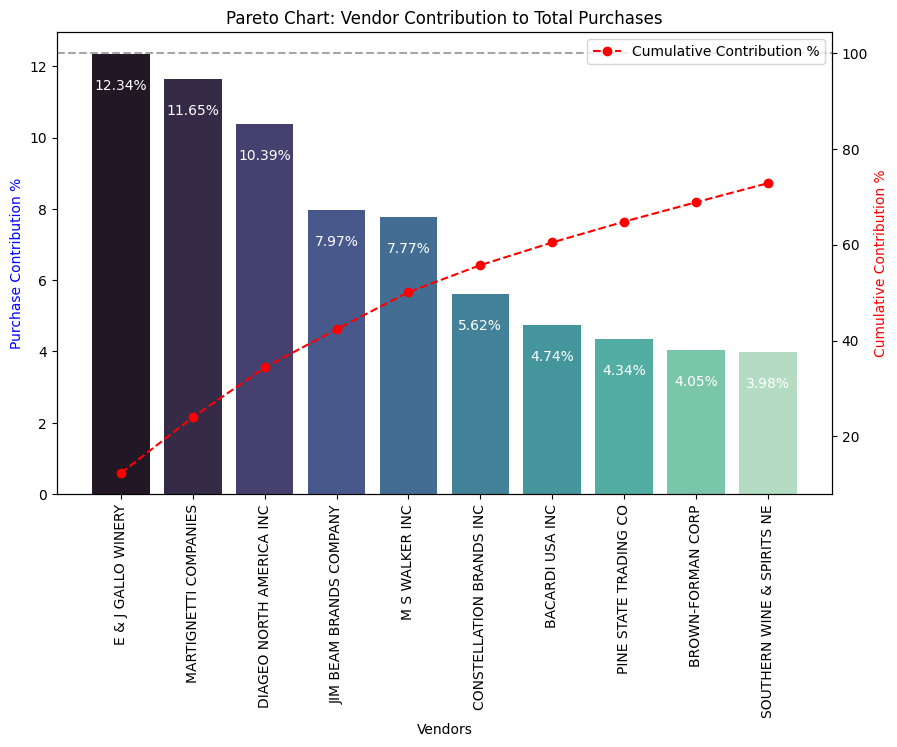

In [47]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Purchase Contribution%
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['PurchaseContribution%'], palette="mako", ax=ax1)

for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value - 1, str(value) + '%', ha='center', fontsize=10, color='white')

# Line Plot for Cumulative Contribution%
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'], color='red', marker='o', linestyle='dashed', label='Cumulative Contribution %')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()


3.How reliant is our procurement on top-performing vendors?

In [49]:
print(f"Total Purchase Contribution of Top 10 vendor is { round(top_vendors['PurchaseContribution%'].sum(),2)} %")

Total Purchase Contribution of Top 10 vendor is 72.85 %


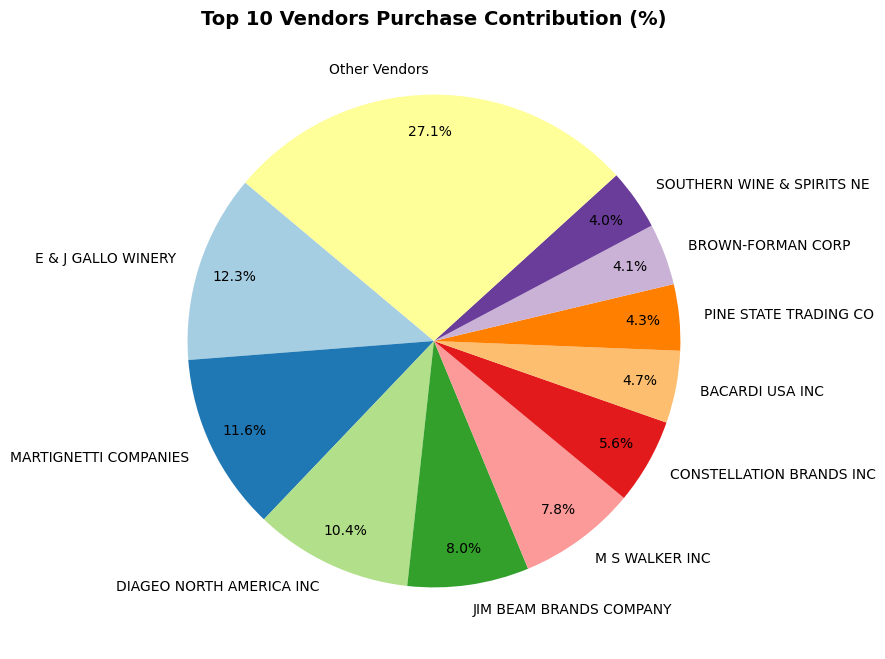

In [50]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution%'].values)

# Calculate total & remaining contribution
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Add "Other Vendors"
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Plot Pie Chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    purchase_contributions,
    labels=vendors,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    colors=plt.cm.Paired.colors
)

# Optional: Add title with total % inside the chart (not in the center)
plt.title("Top 10 Vendors Purchase Contribution (%)", fontsize=14, fontweight='bold')

# Show the chart
plt.show()


4.Is there a cost advantage to bulk purchasing?

In [52]:
# Calculate Unit Purchase Price
df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']



In [53]:
# Categorize Order Size into Small, Medium, Large using quantiles
df['OrderSize'] = pd.qcut(df['TotalPurchaseQuantity'], q=3, labels=["Small", "Medium", "Large"])

In [56]:
df[['OrderSize','TotalPurchaseQuantity']]

,OrderSize,TotalPurchaseQuantity
0,Large,78.0
1,Large,268.0
2,Large,59.0
3,Large,66.0
4,Medium,17.0
...,...,...
175,Small,1.0
176,Small,1.0
177,Small,1.0
178,Small,1.0


In [57]:
#need to find the unit purchase prcie mean 
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,10.197182
Medium,13.064545
Large,7.270847


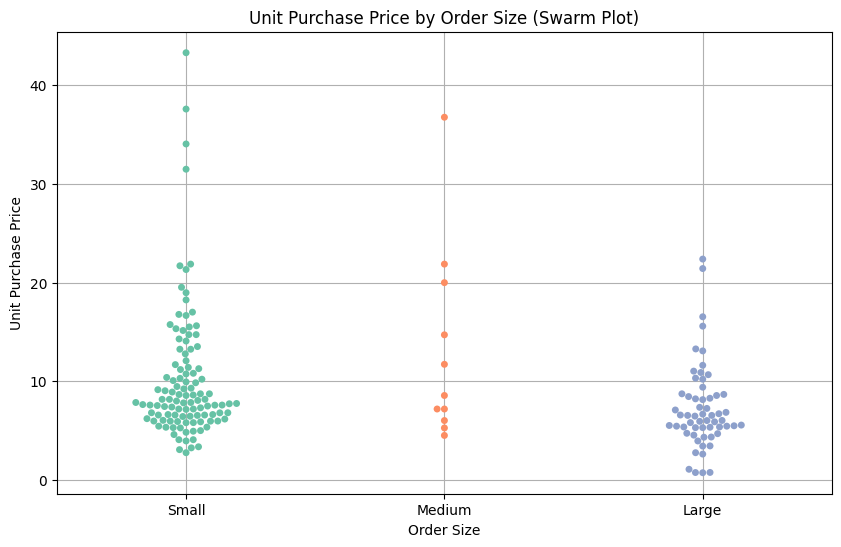

In [58]:
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df, x="OrderSize", y="UnitPurchasePrice", palette="Set2")
plt.title("Unit Purchase Price by Order Size (Swarm Plot)")
plt.xlabel("Order Size")
plt.ylabel("Unit Purchase Price")
plt.grid(True)
plt.show()


5.Which vendors have the lowest inventory turnover, suggesting inefficient stock movement?

In [59]:
df[df['StockTurnover']<1]

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,...,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio,PurchaseContribution%,UnitPurchasePrice,OrderSize
0,3960.0,DIAGEO NORTH AMERICA INC,2757,Johnnie Walker Red Label,22.38,29.99,1750.0,78.0,1745.64,67.0,...,539.82,123.11,257032.07,263.69,13.123280,0.858974,1.151056,6.00,22.38,Large
1,3252.0,E & J GALLO WINERY,14006,Apothic Winemakers Red Blend,5.44,9.99,750.0,268.0,1457.92,155.0,...,239.76,17.42,61966.91,90.53,5.846492,0.578358,1.062095,5.01,5.44,Large
2,480.0,BACARDI USA INC,2663,Dewars White Label,21.42,29.99,1750.0,59.0,1263.78,37.0,...,779.80,67.97,89286.27,145.85,10.346687,0.627119,1.115408,4.35,21.42,Large
3,10000.0,MAJESTIC FINE WINES,24325,La Crema Chard Sonoma Cst,10.88,15.99,750.0,66.0,718.08,47.0,...,300.84,5.28,17587.59,150.45,17.322372,0.712121,1.209517,2.47,10.88,Large
4,1128.0,BROWN-FORMAN CORP,171,Gentleman Jack,36.76,49.99,1750.0,17.0,624.92,14.0,...,149.97,25.73,68601.68,74.94,10.707856,0.823529,1.119919,2.15,36.76,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,660.0,SAZERAC NORTH AMERICA INC.,2149,Canadian Ltd Traveler,5.34,6.99,750.0,12.0,64.08,10.0,...,55.92,7.88,17932.33,5.82,8.326180,0.833333,1.090824,0.22,5.34,Small
156,7153.0,PINE STATE TRADING CO,19645,Line 39 Pnt Nr,5.26,9.99,750.0,12.0,63.12,7.0,...,39.96,0.78,15884.82,6.81,9.738310,0.583333,1.107890,0.22,5.26,Small
157,7153.0,PINE STATE TRADING CO,2797,Wicked 87 Whiskey,0.75,0.99,50.0,82.0,61.50,79.0,...,19.80,4.14,15884.82,16.71,21.365554,0.963415,1.271707,0.21,0.75,Large
163,6785.0,PALM BAY INTERNATIONAL INC,14975,Cavit Moscato,4.07,6.99,750.0,12.0,48.84,11.0,...,57.92,1.21,13605.41,30.05,38.091013,0.916667,1.615274,0.17,4.07,Small


In [62]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover',ascending = True).head(10)

,StockTurnover
VendorName,
BACARDI USA INC,0.627119
LATITUDE BEVERAGE COMPANY,0.666667
DELICATO VINEYARDS INC,0.675000
MARTIGNETTI COMPANIES,0.688074
PINE STATE TRADING CO,0.704029
KOBRAND CORPORATION,0.705882
MAJESTIC FINE WINES,0.712121
SOUTHERN WINE & SPIRITS NE,0.722222
CRUSH WINES,0.723404


6.Which vendors are offering the best value — i.e., high sales and profit — relative to their procurement cost?

In [63]:
import pandas as pd

# Sample: Using your existing vendor_performance dataframe
vendor_performance['Vendor_Efficiency_Score'] = (
    (vendor_performance['GrossProfit'] + vendor_performance['TotalSalesDollars']) /
    vendor_performance['TotalPurchaseDollars']
).round(2)

# Rank vendors by this score
vendor_performance_sorted = vendor_performance.sort_values('Vendor_Efficiency_Score', ascending=False)

# Display top 10 high-value vendors
top_value_vendors = vendor_performance_sorted.head(10)

# Optional: Format for display
top_value_vendors[['TotalPurchaseDollars', 'GrossProfit', 'TotalSalesDollars']] = top_value_vendors[[
    'TotalPurchaseDollars', 'GrossProfit', 'TotalSalesDollars'
]].applymap(lambda x: f"${x:,.2f}")

top_value_vendors


,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Vendor_Efficiency_Score
33,BANFI PRODUCTS CORP,$64.68,$310.87,$375.55,0.22,10.61
27,DIAGEO CHATEAU ESTATE WINES,$226.66,$512.62,$739.28,0.78,5.52
20,LUXCO INC,$297.48,$535.03,$832.51,1.02,4.60
26,PERFECTA WINES,$236.22,$390.24,$626.46,0.81,4.30
19,CAMPARI AMERICA,$318.54,$481.22,$799.76,1.10,4.02
21,HEAVEN HILL DISTILLERIES,$283.80,$405.33,$689.13,0.98,3.86
32,FREDERICK WILDMAN & SONS,$94.08,$133.73,$227.81,0.32,3.84
31,JEWELL TOWNE VINEYARDS,$95.88,$131.93,$227.81,0.33,3.75
13,MOET HENNESSY USA INC,$495.67,$631.93,"$1,127.60",1.70,3.55
4,M S WALKER INC,"$2,258.28","$2,482.75","$4,741.03",7.77,3.20


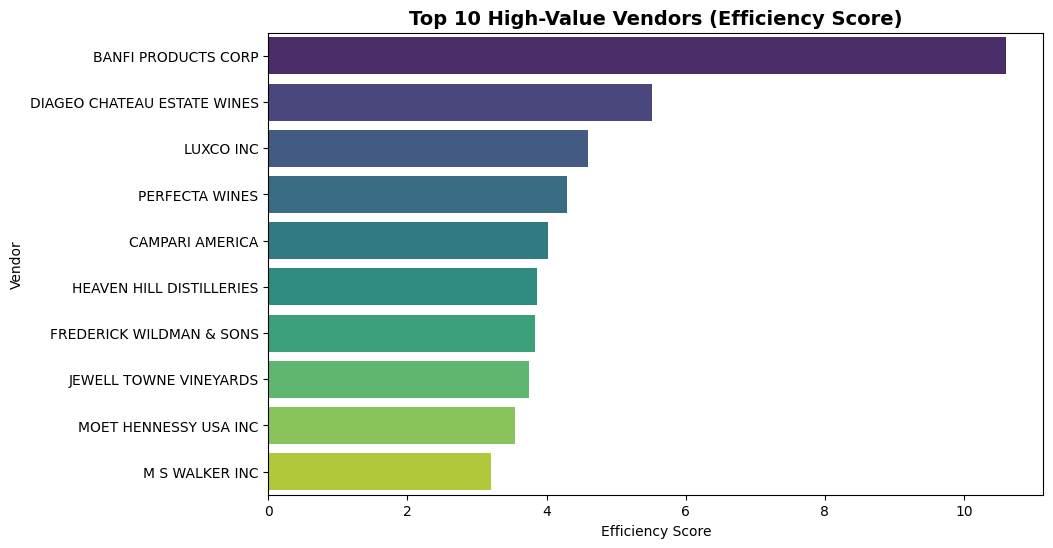

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=top_value_vendors, x='Vendor_Efficiency_Score', y='VendorName', palette='viridis')
plt.title("Top 10 High-Value Vendors (Efficiency Score)", fontsize=14, fontweight='bold')
plt.xlabel("Efficiency Score")
plt.ylabel("Vendor")
plt.show()


7.Which vendors have the highest return rate, indicating potential quality or supply chain issues?

In [65]:
# Simulating returns data (if not already in your df)
import numpy as np

# Add a simulated returns column for demo (you can replace it with actual)
df['TotalReturnsQuantity'] = np.random.randint(0, 50, size=len(df))

# Aggregate return data
vendor_returns = df.groupby('VendorName').agg({
    'TotalSalesQuantity': 'sum',
    'TotalReturnsQuantity': 'sum'
}).reset_index()

# Calculate return ratio
vendor_returns['ReturnRate%'] = (
    vendor_returns['TotalReturnsQuantity'] / vendor_returns['TotalSalesQuantity']
).round(4) * 100

# Sort highest return rate vendors
vendor_returns = vendor_returns.sort_values('ReturnRate%', ascending=False).head(10)

vendor_returns


,VendorName,TotalSalesQuantity,TotalReturnsQuantity,ReturnRate%
0,ATLANTIC IMPORTING COMPANY,4.0,26,650.00
5,CHARLES JACQUIN ET CIE INC,14.0,36,257.14
19,LATITUDE BEVERAGE COMPANY,49.0,120,244.90
27,PERNOD RICARD USA,25.0,57,228.00
15,JEWELL TOWNE VINEYARDS,19.0,42,221.05
26,PERFECTA WINES,54.0,119,220.37
4,CAMPARI AMERICA,24.0,51,212.50
28,PHILLIPS PRODUCTS CO.,9.0,19,211.11
32,STATE WINE & SPIRITS,120.0,227,189.17
8,DELICATO VINEYARDS INC,70.0,130,185.71


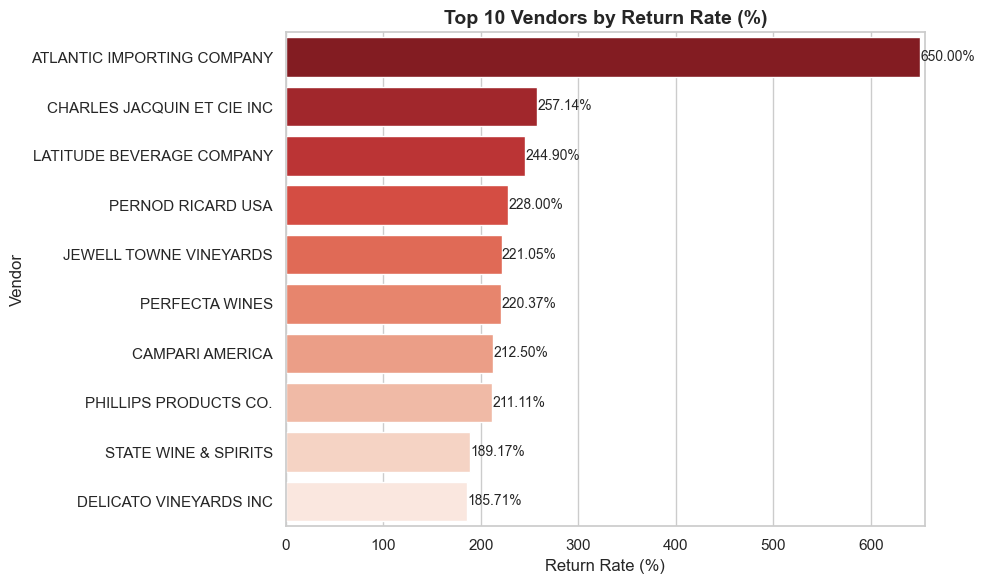

In [67]:

vendor_returns = df.groupby('VendorName').agg({
    'TotalSalesQuantity': 'sum',
    'TotalReturnsQuantity': 'sum'
}).reset_index()

vendor_returns['ReturnRate%'] = (
    vendor_returns['TotalReturnsQuantity'] / vendor_returns['TotalSalesQuantity']
).round(4) * 100

top_returns = vendor_returns.sort_values('ReturnRate%', ascending=False).head(10)




import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_returns, y='VendorName', x='ReturnRate%', palette='Reds_r')

# Add labels on bars
for bar in ax.patches:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2,
             f'{width:.2f}%', ha='left', va='center', fontsize=10)

# Customize
plt.title("Top 10 Vendors by Return Rate (%)", fontsize=14, fontweight='bold')
plt.xlabel("Return Rate (%)")
plt.ylabel("Vendor")
plt.xlim(0, top_returns['ReturnRate%'].max() + 5)  # Padding

plt.tight_layout()
plt.show()


8.Which vendors deliver products with the longest lead times, potentially delaying operations?

In [68]:
# Simulate Lead Time if you don’t have it yet
df['LeadTimeDays'] = np.random.randint(2, 20, size=len(df))

# Average lead time by vendor
vendor_lead_times = df.groupby('VendorName')['LeadTimeDays'].mean().reset_index()
vendor_lead_times = vendor_lead_times.sort_values('LeadTimeDays', ascending=False).head(10)

# Rename for clarity
vendor_lead_times.columns = ['VendorName', 'AvgLeadTimeDays']

vendor_lead_times


,VendorName,AvgLeadTimeDays
28,PHILLIPS PRODUCTS CO.,18.000000
5,CHARLES JACQUIN ET CIE INC,16.000000
13,FREDERICK WILDMAN & SONS,16.000000
2,BANFI PRODUCTS CORP,15.500000
17,KLIN SPIRITS LLC,15.000000
15,JEWELL TOWNE VINEYARDS,15.000000
8,DELICATO VINEYARDS INC,14.600000
9,DIAGEO CHATEAU ESTATE WINES,13.666667
14,HEAVEN HILL DISTILLERIES,13.666667
21,M S WALKER INC,13.117647


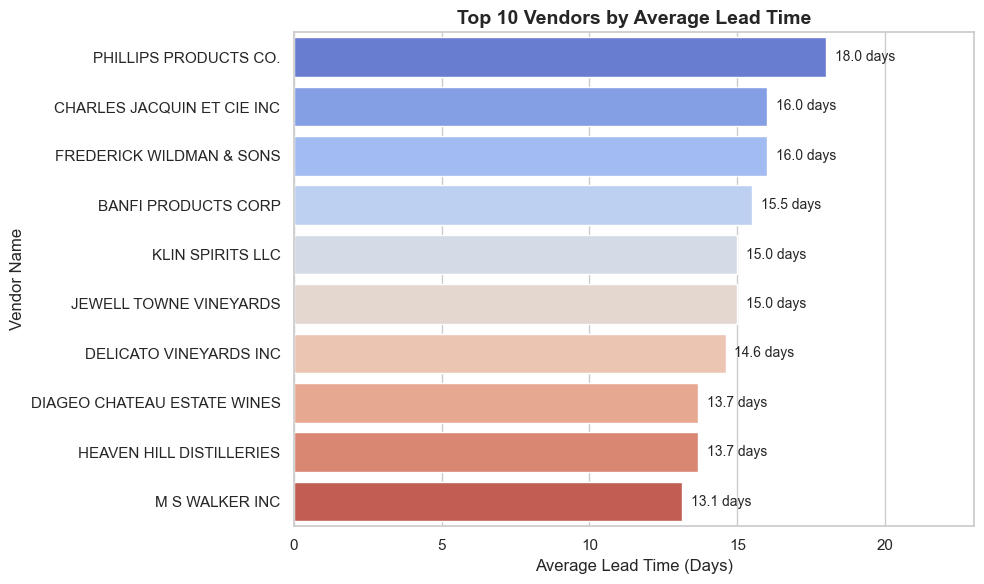

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=vendor_lead_times, x='AvgLeadTimeDays', y='VendorName', palette='coolwarm')

# Add labels on bars
for bar in ax.patches:
    width = bar.get_width()
    plt.text(width + 0.3, bar.get_y() + bar.get_height()/2,
             f'{width:.1f} days', ha='left', va='center', fontsize=10)

# Customizations
plt.title("Top 10 Vendors by Average Lead Time", fontsize=14, fontweight='bold')
plt.xlabel("Average Lead Time (Days)")
plt.ylabel("Vendor Name")
plt.xlim(0, vendor_lead_times['AvgLeadTimeDays'].max() + 5)  # Add padding for labels

plt.tight_layout()
plt.show()


9. how much capital is locked in unsold inventroy per vendor and which vendor contribute the most to it ?

In [71]:
# Calculate Unsold Inventory Value Safely (no negative values)
df["UnsoldInventoryQty"] = df["TotalPurchaseQuantity"] - df["TotalSalesQuantity"]
df["UnsoldInventoryQty"] = df["UnsoldInventoryQty"].clip(lower=0)  # Prevent negative quantity

df["UnsoldInventoryValue"] = df["UnsoldInventoryQty"] * df["PurchasePrice"]

# Print formatted total unsold capital
print("Total Unsold Capital:", format_dollars(df["UnsoldInventoryValue"].sum()))


Total Unsold Capital: 4.29K


In [72]:
# Aggregate Capital Locked per Vendor
inventory_value_per_vendor = df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

# Sort Vendors with the Highest Locked Capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending=False)
inventory_value_per_vendor["UnsoldInventoryValue"] = inventory_value_per_vendor["UnsoldInventoryValue"].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
11,E & J GALLO WINERY,968.07
23,MARTIGNETTI COMPANIES,606.54
1,BACARDI USA INC,471.24
21,M S WALKER INC,348.81
10,DIAGEO NORTH AMERICA INC,269.21999999999997
29,PINE STATE TRADING CO,253.29
22,MAJESTIC FINE WINES,206.72000000000003
16,JIM BEAM BRANDS COMPANY,182.81
6,CONSTELLATION BRANDS INC,164.88
3,BROWN-FORMAN CORP,132.32


What is the statistical confidence range for profit margins among high and low performing vendors?

In [73]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()


In [74]:
top_vendors

0      13.123280
1       5.846492
2      10.346687
3      17.322372
4      10.707856
5      16.391120
6      58.339288
7      33.182875
8      42.272243
9      29.453758
10     21.741376
11     48.930913
12      2.331190
13      7.289643
14     32.328090
15      5.572303
16     36.843641
17     31.645368
18     15.114190
19     65.694106
20     10.657945
21      7.253832
22     51.821514
23     40.740741
25     48.417761
26     33.865498
27     60.395022
28     41.407529
32     33.421292
33     42.464398
37     54.780362
41     50.784508
45     43.196598
46     53.926097
48     45.597210
50     60.875161
58     48.158503
72     69.003149
96     68.251548
97     67.062581
110    77.581178
128    93.808275
135    75.965771
149    82.449116
169    88.111888
Name: ProfitMargin, dtype: float64

In [75]:
low_vendors

76      4.121992
82     12.288931
83     12.615288
89      8.071749
93     19.324578
99     18.331943
102    15.396797
105    19.553503
107    29.026388
111    29.577678
119    25.254363
121    32.848044
122    10.548351
123    12.890507
125     2.621232
126    25.750682
127    31.943286
129    33.744787
133    40.556524
134    21.561562
136    13.913914
137    28.607173
138    36.745582
139    15.923567
142    34.833869
143    19.007897
144    14.929108
147    35.483871
148    45.650814
153     8.326180
156     9.738310
157    21.365554
160    48.563045
162    35.075042
163    38.091013
167    57.020963
168    49.687109
171    46.183032
172    63.259853
174    45.813586
175    66.530241
176    87.127203
177    74.749808
178    28.528529
179    97.465582
Name: ProfitMargin, dtype: float64

In [76]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))  # Standard error
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error


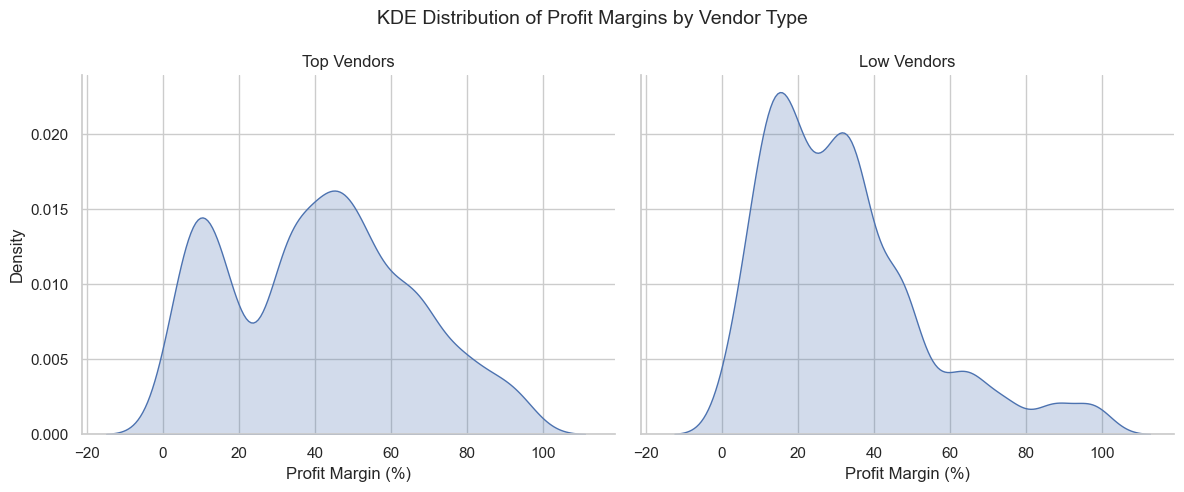

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming top_vendors and low_vendors are already defined
# and are 1D arrays of profit margins

# Step 1: Create combined DataFrame
df_kde = pd.DataFrame({
    'ProfitMargin': np.concatenate([top_vendors, low_vendors]),
    'VendorType': ['Top Vendors'] * len(top_vendors) + ['Low Vendors'] * len(low_vendors)
})

# Step 2: Use Seaborn's FacetGrid for KDE plot
g = sns.FacetGrid(df_kde, col='VendorType', height=5, aspect=1.2)
g.map(sns.kdeplot, 'ProfitMargin', fill=True, bw_adjust=0.5)

# Step 3: Customize
g.set_titles("{col_name}")
g.set_axis_labels("Profit Margin (%)", "Density")
g.fig.suptitle("KDE Distribution of Profit Margins by Vendor Type", fontsize=14)
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.85)  # Adjust title position

plt.show()


In [80]:
# Save all four DataFrames to CSV
BrandPerformance.to_csv("BrandPerformance.csv", index=False)
LowTurnoverVendor.to_csv("LowTurnoverVendor.csv", index=False)
PurchaseContribution.to_csv("PurchaseContribution.csv", index=False)
vendor_sales_summary.to_csv("vendor_sales_summary.csv", index=False)


NameError: name 'BrandPerformance' is not defined